In [15]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
import random 


In [16]:
# Initializations 
current_velocity = 2 
current_displacement = 0
current_acceleration = 0
total_time = 100 # Time_steps/Iterations
acceleration_dict = {
    0:0,
    5:2,
    10:8,
    20:-2,
    40:5,
    45:9,
    60:-3,
    85:0
}


In [17]:
true_values = []

for t in range(1, total_time+1):

    # Calculations based on simplified km equation

    current_displacement = current_displacement + current_velocity + 0.5 * current_acceleration

    # get the acceleration 

    try: 
        current_acceleration = acceleration_dict[t]
    except KeyError:
        pass

    current_velocity = current_velocity + current_acceleration

    true_values.append((current_displacement,current_velocity,current_acceleration))

    



In [18]:
error_range = [700,30,15]
measurement = []

In [19]:
# Add random noise

for item in true_values:
    # unpack
    d,v,a = item 
    rand_error = [random.randint(-1*error_range[0],error_range[0]), random.randint(-1*error_range[1], error_range[1]), random.randint(-1*error_range[2], error_range[2])]
    new_disp = d + rand_error[0] if d+rand_error[0]>0 else 0
    new_vel = v + rand_error[1]
    new_acc = a + rand_error[2]

    measurement.append((new_disp,new_vel,new_acc))


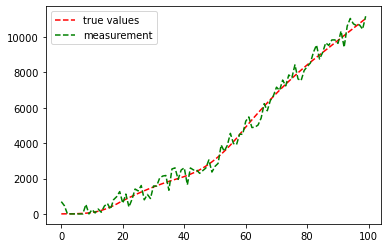

In [20]:
# Plot

plt.plot([i for i in range(total_time)], [y[0] for y in true_values], 'r--', label="true values")
plt.plot([i for i in range(total_time)], [y[0] for y in measurement], 'g--', label = "measurement")
plt.legend()
plt.show()

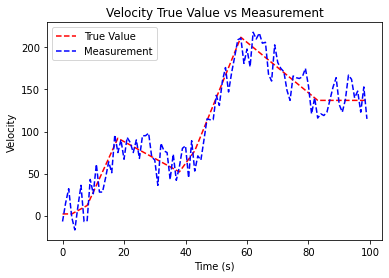

In [21]:
plt.plot([i for i in range(total_time)], [y[1] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[1] for y in measurement], 'b--', label='Measurement')

plt.title("Velocity True Value vs Measurement")
plt.ylabel("Velocity")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

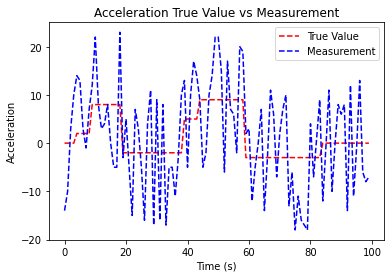

In [22]:
plt.plot([i for i in range(total_time)], [y[2] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[2] for y in measurement], 'b--', label='Measurement')

plt.title("Acceleration True Value vs Measurement")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

In [24]:
# Kalman Filter
# Initialization

x_k = np.asarray([30,20]) # initial disp and vel
Q = np.asarray([[0.004,0.002],[0.002,0.001]]) #Error Covarience matrix 
A = np.asarray([[1,1],[0,1]]) #Transition matrix. Displacement is updated with prev disp + curr vel while velocity is updated
R = np.asarray([[0.4,0.01],[0.04,0.01]]) #Measurement error. This is higher than estimation error since we know our measurement contains a lot of noises.
H = np.asarray([[1,0],[0,1]]) #Observation matrix. We want every state from our state vector.
P = np.asarray([[0,0],[0,0]]) #Error matrix. 



In [25]:
estimation = []

for k_loop in range(total_time):

    #z_k is measurement at every step
    z_k = np.asarray([measurement[k_loop][0], measurement[k_loop][1]]) 
    
    # Predict Estimate
    x_k = A.dot(x_k) 
    
    # Predict error cov
    P = (A.dot(P)).dot(A.T) + Q 
    
    #Updated Kalman Gain
    K = (P.dot(H.T)).dot(np.linalg.inv((H.dot(P).dot(H.T)) + R))

    #Update Estimate
    x_k = x_k + K.dot((z_k - H.dot(x_k)))

    # Update error covariance
    P = (np.identity(2) - K.dot(H)).dot(P)

    # Append the estimations 
    estimation.append((x_k[0], x_k[1]))



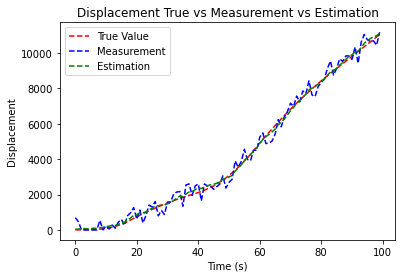

In [26]:
plt.plot([i for i in range(total_time)], [y[0] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[0] for y in measurement], 'b--', label='Measurement')
plt.plot([i for i in range(total_time)], [y[0] for y in estimation], 'g--', label='Estimation')

plt.title("Displacement True vs Measurement vs Estimation")
plt.ylabel("Displacement")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

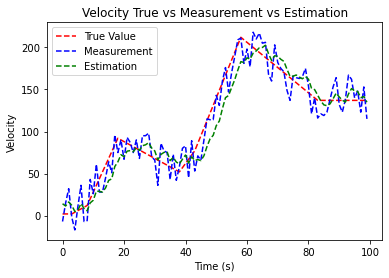

In [27]:
plt.plot([i for i in range(total_time)], [y[1] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[1] for y in measurement], 'b--', label='Measurement')
plt.plot([i for i in range(total_time)], [y[1] for y in estimation], 'g--', label='Estimation')


plt.title("Velocity True vs Measurement vs Estimation")
plt.ylabel("Velocity")
plt.xlabel("Time (s)")
plt.legend()
plt.show()